In [1]:
%pwd

'C:\\Users\\mtab'

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [9]:
from sklearn.feature_selection import f_regression,RFE   #RFE :WRAPPER ,FREG :FILTER

In [10]:
data=pd.read_csv("Student_Performance.csv")

In [11]:
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [15]:
data.drop("Extracurricular Activities",axis=1,inplace=True) #removing object type

In [16]:
data

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,9,1,91.0
1,4,82,4,2,65.0
2,8,51,7,2,45.0
3,5,52,5,2,36.0
4,7,75,8,5,66.0
...,...,...,...,...,...
9995,1,49,4,2,23.0
9996,7,64,8,5,58.0
9997,6,83,8,5,74.0
9998,9,97,7,0,95.0


In [21]:
df=pd.read_csv("Admission_Predict.csv")

In [22]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [24]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [25]:
#clean columns
df.columns=df.columns.str.strip()
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [26]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [28]:
import statsmodels.api as sm

In [29]:
X=df.drop("Chance of Admit",axis=1)

In [30]:
X_const=sm.add_constant(X)
vif_features=pd.DataFrame()    #empty DF
vif_features['features']=X_const.columns
vif_features['VIF']=[variance_inflation_factor(X_const.values,i) for i in range(X_const.shape[1])]

In [31]:
#if vif >10 :multi correl
vif_features

,features,VIF
0,const,1533.435012
1,Serial No.,1.087496
2,GRE Score,4.617117
3,TOEFL Score,4.357634
4,University Rating,2.959083
5,SOP,3.113171
6,LOR,2.432982
7,CGPA,5.419519
8,Research,1.543329


In [33]:
from sklearn.model_selection import train_test_split
Y=df['Chance of Admit']
X_train,X_split,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [36]:
X_train.shape

(320, 8)

In [37]:
X_split.shape

(80, 8)

Y_train.shape

In [39]:
Y_test.shape

(80,)

In [40]:
from sklearn.linear_model import LinearRegression
#filter ANOVA
f_score,p_value=f_regression(X_train,Y_train)

#wrapper method
RFE()
Init signature:
RFE(
    estimator,
    *,
    n_features_to_select=None,
    step=1,
    verbose=0,: output at end
    importance_getter='auto',
)
coef_
feature_importance_

In [42]:
rfe=RFE(LinearRegression(),n_features_to_select=5)
rfe.fit(X_train,Y_train)
features_selected=pd.DataFrame({
    'Features':X_train.columns,
    'F score':f_score,
    'p val': p_value,
    'rfe ranking':rfe.ranking_
})
features_selected

,Features,F score,p val,rfe ranking
0,Serial No.,1.871572,1.722610e-01,4
1,GRE Score,578.757756,1.429869e-73,2
2,TOEFL Score,508.463462,6.344140e-68,1
3,University Rating,336.841085,8.199160e-52,1
4,SOP,263.411578,1.424603e-43,3
5,LOR,226.292491,5.341324e-39,1
6,CGPA,980.157945,3.782644e-99,1
7,Research,135.906150,2.174883e-26,1


In [45]:
features_selected.sort_values(by="rfe ranking")

,Features,F score,p val,rfe ranking
2,TOEFL Score,508.463462,6.344140e-68,1
3,University Rating,336.841085,8.199160e-52,1
5,LOR,226.292491,5.341324e-39,1
6,CGPA,980.157945,3.782644e-99,1
7,Research,135.906150,2.174883e-26,1
1,GRE Score,578.757756,1.429869e-73,2
4,SOP,263.411578,1.424603e-43,3
0,Serial No.,1.871572,1.722610e-01,4


#Anova
F score high : strong relationship b/w independent and target column


In [46]:
import seaborn as sns

<Axes: >

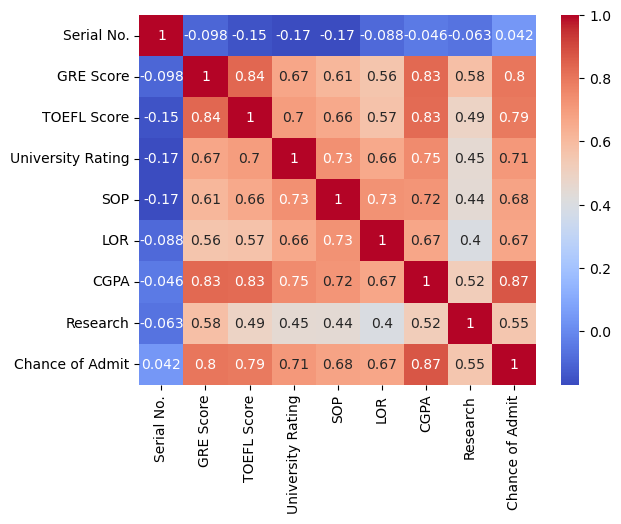

In [47]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')